In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from datetime import datetime
%matplotlib inline
sns.set()

from sklearn.ensemble import RandomForestRegressor


In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [4]:
train.shape[0]

10886

In [5]:
test.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
5,2011-01-20 05:00:00,1,0,1,1,9.84,11.365,60,15.0013
6,2011-01-20 06:00:00,1,0,1,1,9.02,10.605,60,15.0013
7,2011-01-20 07:00:00,1,0,1,1,9.02,10.605,55,15.0013
8,2011-01-20 08:00:00,1,0,1,1,9.02,10.605,55,19.0012
9,2011-01-20 09:00:00,1,0,1,2,9.84,11.365,52,15.0013


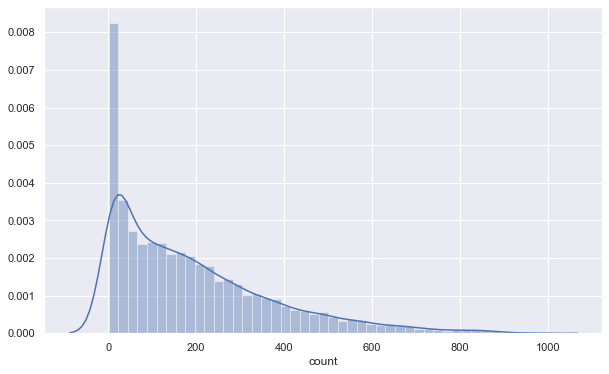

In [6]:
fig = plt.subplots(figsize=(10, 6))
sns.distplot(train['count'], hist=True)

In [7]:
print('Skewness:  {}'.format(train['count'].skew()))
print('Kurtosis: {}'.format(train['count'].kurt()))

Skewness:  1.2420662117180776
Kurtosis: 1.3000929518398334


In [8]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

/Users/wonhee/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


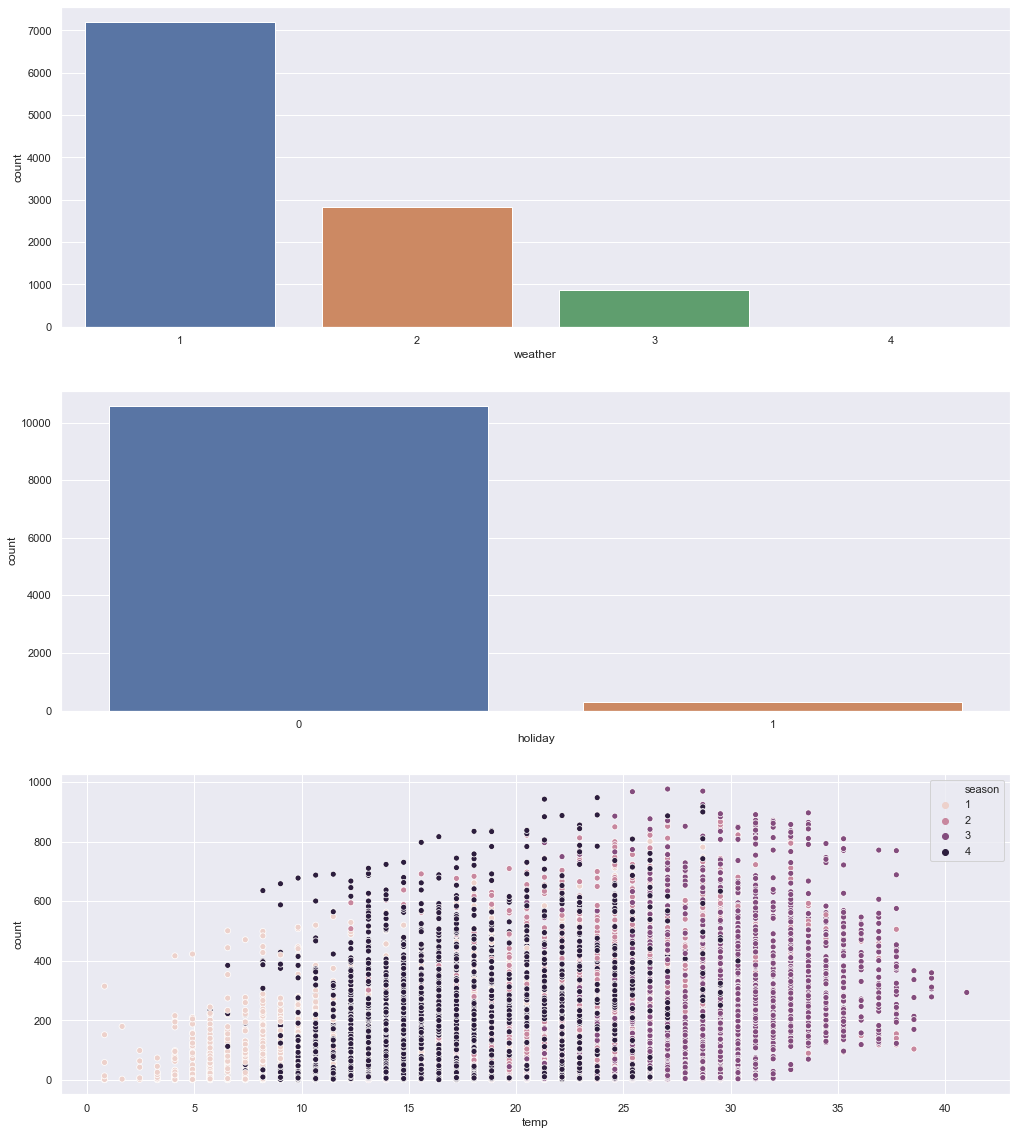

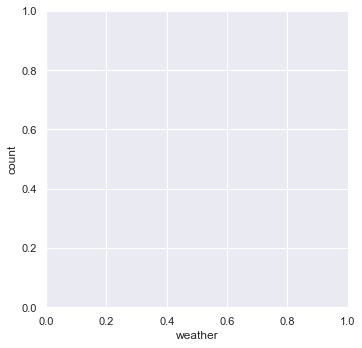

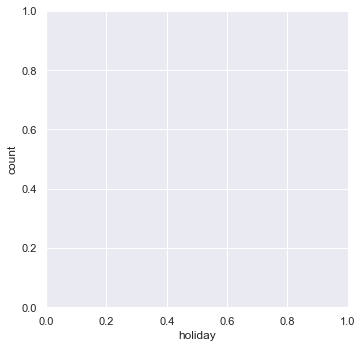

In [9]:
fig, axs = plt.subplots(nrows=3, figsize=(17,20))
cmap = plt.get_cmap('jet')

sns.factorplot(x='weather', kind='count', data=train, ax=axs[0])
sns.factorplot(x='holiday', kind='count', data=train, ax=axs[1])
sns.scatterplot(x=train['temp'], y='count', hue='season', cmap=cmap, data=train, ax=axs[2])

plt.show()

In [9]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


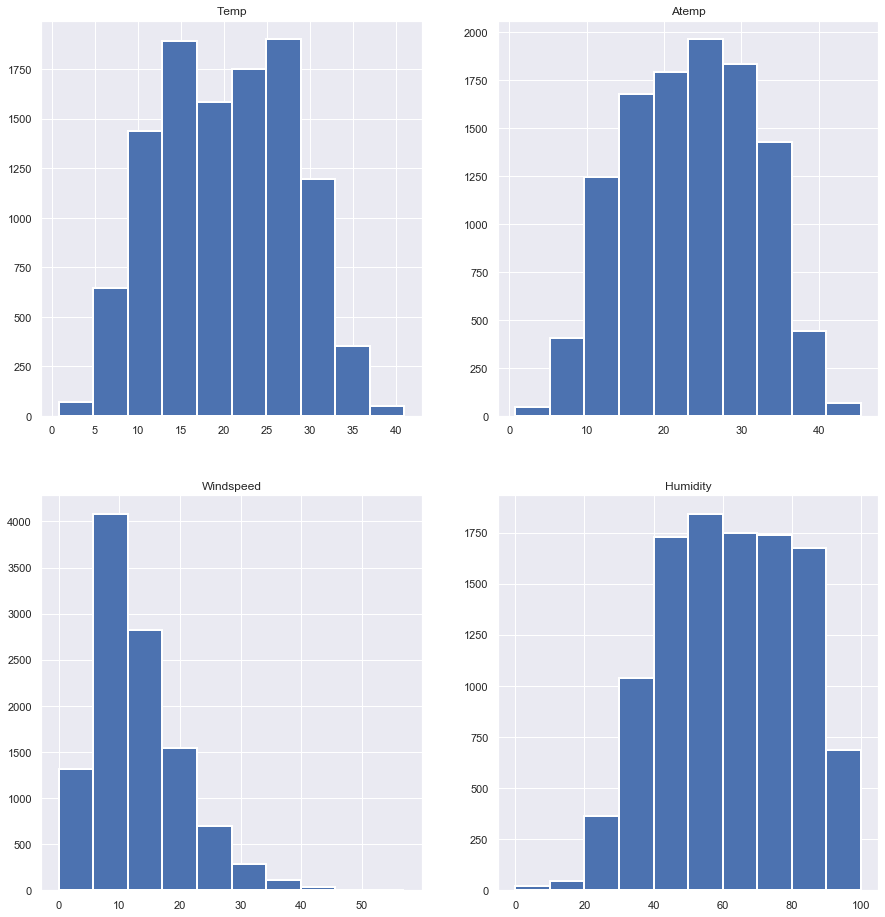

In [10]:
fig, axs= plt.subplots(nrows=2, ncols=2, figsize=(15, 16))

axs[0,0].hist(x='temp', data=train, linewidth=2)
axs[0,0].set_title('Temp')
axs[0,1].hist(x='atemp', data=train, linewidth=2)
axs[0,1].set_title('Atemp')
axs[1,0].hist(x='windspeed', data=train, linewidth=2)
axs[1,0].set_title('Windspeed')
axs[1,1].hist(x='humidity', data=train, linewidth=2)
axs[1,1].set_title('Humidity')

plt.show()

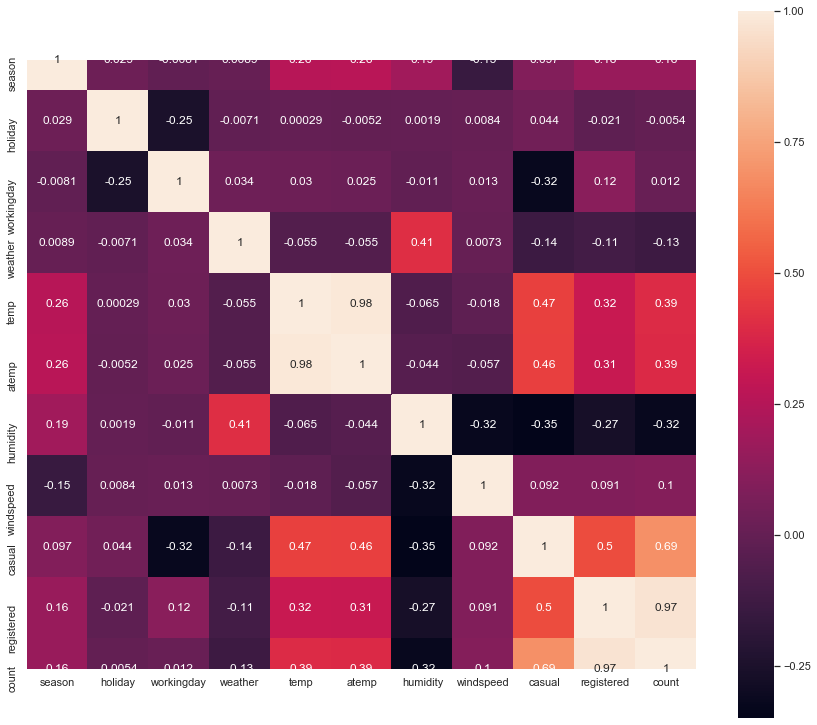

In [15]:
train_heat = train.corr()
#mask = np.array(train_heat)
fig = plt.subplots(figsize=(15, 13))
sns.heatmap(data=train_heat, annot=True, square=True, cbar=True)

In [11]:
new = train.corr().unstack().sort_values(kind='quicksort', ascending=False).reset_index()
new.rename(columns={'level_0': 'feature1', 'level_1': 'feature2', 0: 'Corr value'}, inplace=True)
new.drop(new[new['Corr value'] == 1].index)

,feature1,feature2,Corr value
11,temp,atemp,0.984948
12,atemp,temp,0.984948
13,count,registered,0.970948
14,registered,count,0.970948
15,casual,count,0.690414
...,...,...,...
116,windspeed,humidity,-0.318607
117,workingday,casual,-0.319111
118,casual,workingday,-0.319111
119,humidity,casual,-0.348187


In [9]:
train['tempdate'] = train['datetime'].apply(lambda x: x.split())

train['year'] = train['tempdate'].apply(lambda x: x[0].split('-')[0])
train['month'] = train['tempdate'].apply(lambda x: x[0].split('-')[1])
train['day'] = train['tempdate'].apply(lambda x: x[0].split('-')[2])
train['hour'] = train['tempdate'].apply(lambda x: x[1].split(':')[0])
train['weekday'] = train['tempdate'].apply(lambda x: calendar.day_abbr[datetime.strptime(x[0], '%Y-%m-%d').weekday()])

In [10]:
test['tempdate'] = test['datetime'].apply(lambda x: x.split())

test['year'] = test['tempdate'].apply(lambda x: x[0].split('-')[0])
test['month'] = test['tempdate'].apply(lambda x: x[0].split('-')[1])
test['day'] = test['tempdate'].apply(lambda x: x[0].split('-')[2])
test['hour'] = test['tempdate'].apply(lambda x: x[1].split(':')[0])
test['weekday'] = test['tempdate'].apply(lambda x: calendar.day_abbr[datetime.strptime(x[0], '%Y-%m-%d').weekday()])

In [11]:
train['year'] = pd.to_numeric(train['year'], errors='coerce')
train['month'] = pd.to_numeric(train['month'], errors='coerce')
train['day'] = pd.to_numeric(train['day'], errors='coerce')
train['hour'] = pd.to_numeric(train['hour'], errors='coerce')

In [12]:
test['year'] = pd.to_numeric(test['year'], errors='coerce')
test['month'] = pd.to_numeric(test['month'], errors='coerce')
test['day'] = pd.to_numeric(test['day'], errors='coerce')
test['hour'] = pd.to_numeric(test['hour'], errors='coerce')

In [13]:
train = train.drop(['tempdate'], axis=1)

In [14]:
test = test.drop(['tempdate'], axis=1)

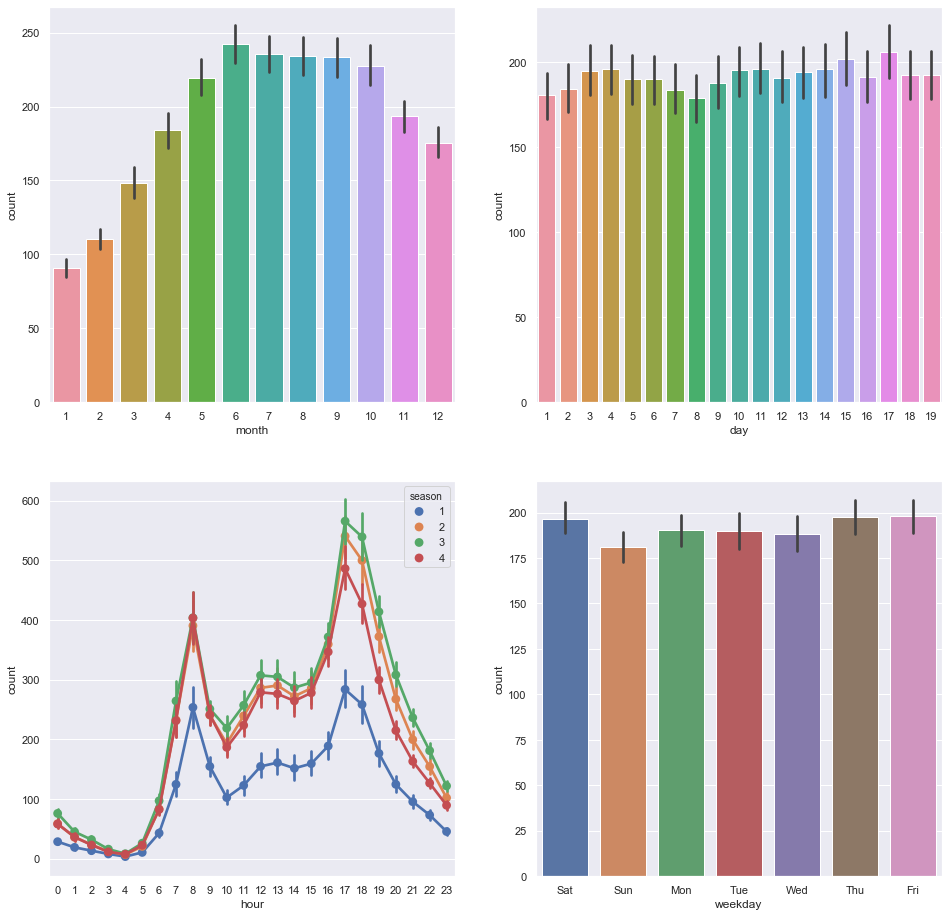

In [18]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 16))

sns.barplot(x='month', y='count', data=train, ax=axs[0][0])
sns.barplot(x='day', y='count', data=train, ax=axs[0][1])
sns.pointplot(x='hour', y='count', hue='season', data=train, ax=axs[1][0])
sns.barplot(x='weekday', y='count', data=train, ax=axs[1][1])

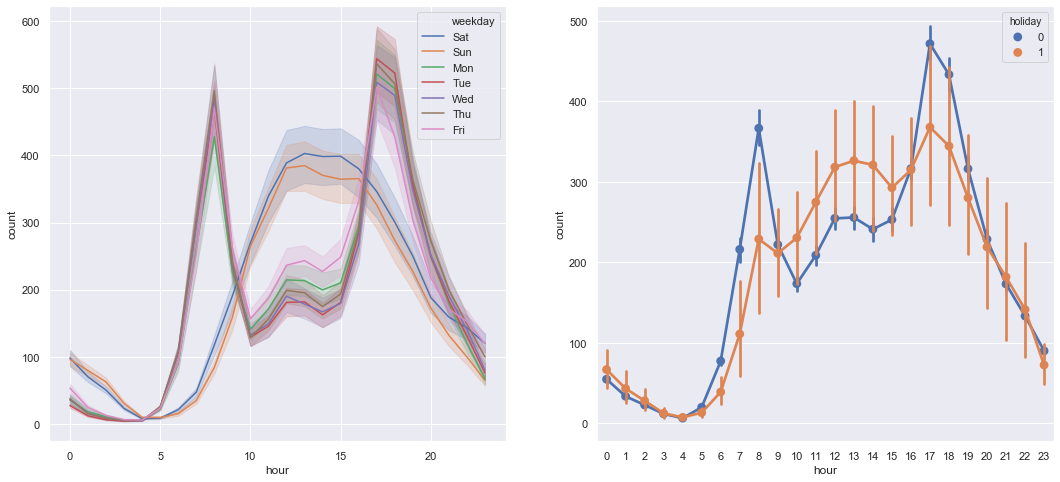

In [20]:

fig, axs = plt.subplots(ncols=2, figsize=(18, 8))

plt.subplot2grid((1, 2), (0, 0))
sns.lineplot(x='hour', y='count', hue='weekday', data=train, markers=True, dashes=False)

plt.subplot2grid((1, 2), (0, 1))
sns.pointplot(x='hour', y='count', data=train, hue='holiday')

In [21]:
train.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,Sat
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,Sat
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,Sat
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,Sat
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,Sat
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,2011,1,1,5,Sat
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2,2011,1,1,6,Sat
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3,2011,1,1,7,Sat
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8,2011,1,1,8,Sat
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14,2011,1,1,9,Sat


In [13]:
train['weekday'].value_counts()

Sat    1584
Sun    1579
Thu    1553
Wed    1551
Mon    1551
Tue    1539
Fri    1529
Name: weekday, dtype: int64

In [39]:
week_map = {'Sat': 5, 'Sun': 6, 'Mon': 0,'Tue': 1, 'Wed': 2, 'Thu': 3, 'Fri': 4 }
train_test_set = [train, test]

for dataset in train_test_set:
    dataset['weekday'] = dataset['weekday'].map(week_map)

In [23]:
train.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,5
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,2011,1,1,5,5
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2,2011,1,1,6,5
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3,2011,1,1,7,5
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8,2011,1,1,8,5
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14,2011,1,1,9,5


In [24]:
train[train['windspeed']==0]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10826,2012-12-17 12:00:00,4,0,1,2,16.40,20.455,87,0.0,21,211,232,2012,12,17,12,0
10829,2012-12-17 15:00:00,4,0,1,2,17.22,21.210,88,0.0,15,196,211,2012,12,17,15,0
10846,2012-12-18 08:00:00,4,0,1,1,15.58,19.695,94,0.0,10,652,662,2012,12,18,8,1
10860,2012-12-18 22:00:00,4,0,1,1,13.94,16.665,49,0.0,5,127,132,2012,12,18,22,1


In [25]:
train.shape, test.shape

((10886, 17), (6493, 14))

In [15]:
def concat_data(train, test):
    return pd.concat([train, test], sort=True).reset_index(drop=True)

def divide_data(data):
    return data.loc[:10885], data.loc[10886:].drop(['casual', 'registered', 'count'], axis=1)

In [16]:
data_all = concat_data(train, test)

In [17]:
data_all.shape

(17379, 17)

In [18]:
data_all.head(10)

,atemp,casual,count,datetime,day,holiday,hour,humidity,month,registered,season,temp,weather,weekday,windspeed,workingday,year
0,14.395,3.0,16.0,2011-01-01 00:00:00,1,0,0,81,1,13.0,1,9.84,1,Sat,0.0000,0,2011
1,13.635,8.0,40.0,2011-01-01 01:00:00,1,0,1,80,1,32.0,1,9.02,1,Sat,0.0000,0,2011
2,13.635,5.0,32.0,2011-01-01 02:00:00,1,0,2,80,1,27.0,1,9.02,1,Sat,0.0000,0,2011
3,14.395,3.0,13.0,2011-01-01 03:00:00,1,0,3,75,1,10.0,1,9.84,1,Sat,0.0000,0,2011
4,14.395,0.0,1.0,2011-01-01 04:00:00,1,0,4,75,1,1.0,1,9.84,1,Sat,0.0000,0,2011
5,12.880,0.0,1.0,2011-01-01 05:00:00,1,0,5,75,1,1.0,1,9.84,2,Sat,6.0032,0,2011
6,13.635,2.0,2.0,2011-01-01 06:00:00,1,0,6,80,1,0.0,1,9.02,1,Sat,0.0000,0,2011
7,12.880,1.0,3.0,2011-01-01 07:00:00,1,0,7,86,1,2.0,1,8.20,1,Sat,0.0000,0,2011
8,14.395,1.0,8.0,2011-01-01 08:00:00,1,0,8,75,1,7.0,1,9.84,1,Sat,0.0000,0,2011
9,17.425,8.0,14.0,2011-01-01 09:00:00,1,0,9,76,1,6.0,1,13.12,1,Sat,0.0000,0,2011


In [29]:
train, test = divide_data(data_all)

In [30]:
train.shape, test.shape

((10886, 17), (6493, 14))

In [19]:
data_all[data_all['windspeed']==0]

,atemp,casual,count,datetime,day,holiday,hour,humidity,month,registered,season,temp,weather,weekday,windspeed,workingday,year
0,14.395,3.0,16.0,2011-01-01 00:00:00,1,0,0,81,1,13.0,1,9.84,1,Sat,0.0,0,2011
1,13.635,8.0,40.0,2011-01-01 01:00:00,1,0,1,80,1,32.0,1,9.02,1,Sat,0.0,0,2011
2,13.635,5.0,32.0,2011-01-01 02:00:00,1,0,2,80,1,27.0,1,9.02,1,Sat,0.0,0,2011
3,14.395,3.0,13.0,2011-01-01 03:00:00,1,0,3,75,1,10.0,1,9.84,1,Sat,0.0,0,2011
4,14.395,0.0,1.0,2011-01-01 04:00:00,1,0,4,75,1,1.0,1,9.84,1,Sat,0.0,0,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17319,12.120,NaN,NaN,2012-12-29 12:00:00,29,0,12,100,12,NaN,1,8.20,3,Sat,0.0,0,2012
17320,12.120,NaN,NaN,2012-12-29 13:00:00,29,0,13,100,12,NaN,1,8.20,3,Sat,0.0,0,2012
17322,12.120,NaN,NaN,2012-12-29 15:00:00,29,0,15,87,12,NaN,1,9.84,2,Sat,0.0,0,2012
17330,12.120,NaN,NaN,2012-12-29 23:00:00,29,0,23,60,12,NaN,1,10.66,2,Sat,0.0,0,2012


In [20]:

windspeed0 = data_all[data_all['windspeed'] == 0]
windspeednot0 = data_all[data_all['windspeed'] != 0]

wind_rfr = RandomForestRegressor()
windspeedcol = ['season', 'weather', 'temp', 'atemp', 'humidity', 'year', 'month', 'day']
    
wind_rfr.fit(windspeednot0[windspeedcol], windspeednot0['windspeed'])
wind_newvalues = wind_rfr.predict(windspeed0[windspeedcol])
windspeed0['windspeed'] = wind_newvalues

data_all = windspeednot0.append(windspeed0)
data_all.reset_index(inplace=True)
data_all.drop('index', axis=1, inplace=True)

/Users/wonhee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [21]:
data_all.head(10)

,atemp,casual,count,datetime,day,holiday,hour,humidity,month,registered,season,temp,weather,weekday,windspeed,workingday,year
0,12.880,0.0,1.0,2011-01-01 05:00:00,1,0,5,75,1,1.0,1,9.84,2,Sat,6.0032,0,2011
1,19.695,12.0,36.0,2011-01-01 10:00:00,1,0,10,76,1,24.0,1,15.58,1,Sat,16.9979,0,2011
2,16.665,26.0,56.0,2011-01-01 11:00:00,1,0,11,81,1,30.0,1,14.76,1,Sat,19.0012,0,2011
3,21.210,29.0,84.0,2011-01-01 12:00:00,1,0,12,77,1,55.0,1,17.22,1,Sat,19.0012,0,2011
4,22.725,47.0,94.0,2011-01-01 13:00:00,1,0,13,72,1,47.0,1,18.86,2,Sat,19.9995,0,2011
5,22.725,35.0,106.0,2011-01-01 14:00:00,1,0,14,72,1,71.0,1,18.86,2,Sat,19.0012,0,2011
6,21.970,40.0,110.0,2011-01-01 15:00:00,1,0,15,77,1,70.0,1,18.04,2,Sat,19.9995,0,2011
7,21.210,41.0,93.0,2011-01-01 16:00:00,1,0,16,82,1,52.0,1,17.22,2,Sat,19.9995,0,2011
8,21.970,15.0,67.0,2011-01-01 17:00:00,1,0,17,82,1,52.0,1,18.04,2,Sat,19.0012,0,2011
9,21.210,9.0,35.0,2011-01-01 18:00:00,1,0,18,88,1,26.0,1,17.22,3,Sat,16.9979,0,2011


In [22]:
train, test = divide_data(data_all)

In [23]:
train.shape, test.shape

((10886, 17), (6493, 14))

In [24]:
train.head(10)

,atemp,casual,count,datetime,day,holiday,hour,humidity,month,registered,season,temp,weather,weekday,windspeed,workingday,year
0,12.880,0.0,1.0,2011-01-01 05:00:00,1,0,5,75,1,1.0,1,9.84,2,Sat,6.0032,0,2011
1,19.695,12.0,36.0,2011-01-01 10:00:00,1,0,10,76,1,24.0,1,15.58,1,Sat,16.9979,0,2011
2,16.665,26.0,56.0,2011-01-01 11:00:00,1,0,11,81,1,30.0,1,14.76,1,Sat,19.0012,0,2011
3,21.210,29.0,84.0,2011-01-01 12:00:00,1,0,12,77,1,55.0,1,17.22,1,Sat,19.0012,0,2011
4,22.725,47.0,94.0,2011-01-01 13:00:00,1,0,13,72,1,47.0,1,18.86,2,Sat,19.9995,0,2011
5,22.725,35.0,106.0,2011-01-01 14:00:00,1,0,14,72,1,71.0,1,18.86,2,Sat,19.0012,0,2011
6,21.970,40.0,110.0,2011-01-01 15:00:00,1,0,15,77,1,70.0,1,18.04,2,Sat,19.9995,0,2011
7,21.210,41.0,93.0,2011-01-01 16:00:00,1,0,16,82,1,52.0,1,17.22,2,Sat,19.9995,0,2011
8,21.970,15.0,67.0,2011-01-01 17:00:00,1,0,17,82,1,52.0,1,18.04,2,Sat,19.0012,0,2011
9,21.210,9.0,35.0,2011-01-01 18:00:00,1,0,18,88,1,26.0,1,17.22,3,Sat,16.9979,0,2011


In [25]:
train = train.drop(['casual', 'registered', 'datetime'], axis=1)

In [75]:
train.head(15)

,atemp,count,day,holiday,hour,humidity,month,season,temp,weather,weekday,windspeed,workingday,year
0,12.880,1.0,1,0,5,75,1,1,9.84,2,5,6.0032,0,2011
1,19.695,36.0,1,0,10,76,1,1,15.58,1,5,16.9979,0,2011
2,16.665,56.0,1,0,11,81,1,1,14.76,1,5,19.0012,0,2011
3,21.210,84.0,1,0,12,77,1,1,17.22,1,5,19.0012,0,2011
4,22.725,94.0,1,0,13,72,1,1,18.86,2,5,19.9995,0,2011
5,22.725,106.0,1,0,14,72,1,1,18.86,2,5,19.0012,0,2011
6,21.970,110.0,1,0,15,77,1,1,18.04,2,5,19.9995,0,2011
7,21.210,93.0,1,0,16,82,1,1,17.22,2,5,19.9995,0,2011
8,21.970,67.0,1,0,17,82,1,1,18.04,2,5,19.0012,0,2011
9,21.210,35.0,1,0,18,88,1,1,17.22,3,5,16.9979,0,2011


In [27]:
test = test.drop(['datetime'], axis=1)

In [76]:
train = train.drop(['day'], axis=1)

In [78]:
categorical_features = ['season', 'holiday', 'workingday', 'year', 'weekday', 'weather', 'month', 'hour',]
for var in categorical_features:
    train[var] = train[var].astype("category")
    test[var] = test[var].astype("category")

In [79]:
test.head(10)

,atemp,day,holiday,hour,humidity,month,season,temp,weather,weekday,windspeed,workingday,year
10886,31.060,25,0,7,57,6,3,26.24,1,5,19.0012,0,2011
10887,32.575,25,0,8,48,6,3,28.70,1,5,16.9979,0,2011
10888,32.575,25,0,9,45,6,3,29.52,1,5,16.9979,0,2011
10889,32.575,25,0,10,45,6,3,29.52,1,5,12.9980,0,2011
10890,32.575,25,0,12,40,6,3,30.34,1,5,19.0012,0,2011
10891,32.575,25,0,13,40,6,3,30.34,1,5,19.0012,0,2011
10892,33.335,25,0,14,45,6,3,30.34,1,5,19.9995,0,2011
10893,34.090,25,0,16,43,6,3,31.16,1,5,19.9995,0,2011
10894,33.335,25,0,17,42,6,3,30.34,1,5,15.0013,0,2011
10895,32.575,25,0,18,45,6,3,29.52,1,5,16.9979,0,2011


In [80]:
train.shape, test.shape

((10886, 13), (6493, 13))

In [81]:
x_train = train.drop(['count'], axis=1)
y_train = train['count']
x_test = test

In [82]:
x_train.shape

(10886, 12)

In [83]:
y_train.shape

(10886,)

In [84]:
x_test.shape

(6493, 13)

In [85]:
from sklearn.metrics import make_scorer, mean_squared_log_error

def rmsle(predict, actual):

    predict = np.array(predict)
    actual = np.array(actual)
    
    log_p = np.log(predict +1)
    log_a = np.log(actual + 1)
    
    dif = (log_p - log_a)**2
    return np.sqrt(np.mean(dif))

rmsle_scorer = make_scorer(rmsle)
rmsle_scorer

make_scorer(rmsle)

In [86]:
from sklearn.model_selection import KFold, cross_val_score

In [87]:
k_fold = KFold(n_splits = 10, shuffle=True, random_state=0)

In [88]:
rf_reg = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=0)
rf_reg

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [90]:
rf_reg.fit(x_train, y_train)
rf_reg_cvs = cross_val_score(rf_reg, x_train, y_train, cv=k_fold, scoring=rmsle_scorer)
rf_reg_cvs.mean()

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').